# K-Nearest-Neighbors

👇 `data` klasöründe bulunan `houses_clean.csv` dataset'ini yükleyin  
Veya doğrudan bu URL'den yükleyebilirsiniz: [https://d32aokrjazspmn.cloudfront.net/materials/ML_Houses_clean.csv](https://d32aokrjazspmn.cloudfront.net/materials/ML_Houses_clean.csv).  

Dataset açıklaması dataset-description.md dosyasında bulunabilir.

In [2]:
import pandas as pd

local_path = 'data/houses_clean.csv'
df = pd.read_csv(local_path)

print(f"Dosya yerel klasörden yüklendi: {local_path}")
print(f"Dataset Boyutu: {df.shape}")
print("-" * 30)
print(df.head())
print("-" * 30)
print(df.info())

Dosya yerel klasörden yüklendi: data/houses_clean.csv
Dataset Boyutu: (1460, 6)
------------------------------
   GrLivArea  BedroomAbvGr  KitchenAbvGr  OverallCond  CentralAir  SalePrice
0   0.380070         0.375      0.333333        0.500           1     208500
1  -0.312090         0.375      0.333333        0.875           1     181500
2   0.497489         0.375      0.333333        0.500           1     223500
3   0.390885         0.375      0.333333        0.500           1     140000
4   1.134029         0.500      0.333333        0.500           1     250000
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GrLivArea     1460 non-null   float64
 1   BedroomAbvGr  1460 non-null   float64
 2   KitchenAbvGr  1460 non-null   float64
 3   OverallCond   1460 non-null   float64
 4   CentralAir    1460 non-null

💡 Çoğu özellik zaten önceden işlenmiştir (normalizasyonla ölçeklendirilmiştir), tıpkı Veri Hazırlama gününde yaptığınız gibi  

💡 Bir özellik olan `GrLiveArea` normalleştirilmemiştir. Daha sonra normalizasyonunun model performansımız üzerindeki etkisini görmek için bu şekilde tutuyoruz  

👇 Bunu tanımlayıcı istatistiklerle kolayca görebilirsiniz, min ve max değerlerine bakın

In [5]:
df.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.078410,0.358305,0.348858,0.571918,0.934932,180921.195890
std,0.813952,0.101972,0.073446,0.139100,0.246731,79442.502883
min,-2.263422,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,-0.516802,0.250000,0.333333,0.500000,1.000000,129975.000000
50%,0.000000,0.375000,0.333333,0.500000,1.000000,163000.000000
75%,0.483198,0.375000,0.333333,0.625000,1.000000,214000.000000
max,6.455002,1.000000,1.000000,1.000000,1.000000,755000.000000


# Varsayılan KNN

🎯 Görev, tüm özelliklerle evlerin fiyatını (`SalePrice`) tahmin etmektir.

👇 Böyle bir görevde varsayılan [KNNRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)'ı değerlendirmek için çapraz doğrulama kullanın.  
❓ `SalePrice`'taki varyansın özellikler tarafından açıklanan oranı nedir?  
Cevabınızı `base_knn_score` adlı bir değişkende saklayın.

<details>
<summary> 💡 İpucu </summary>
    <br>
    ℹ️ Bağımlı değişkendeki varyansın bağımsız değişkenler tarafından açıklanan oranı R2 skoru'dur.
</details>

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# 1. Özellikler ve Hedef Ayrımı
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# 2. Modeli Başlatma (Varsayılan parametrelerle: n_neighbors=5)
knn = KNeighborsRegressor()

# 3. Cross-Validation Uygulama
# cv=5: Veriyi 5 parçaya böler.
# scoring parametresi belirtilmediğinde varsayılan olarak R2 skoru kullanılır.
cv_scores = cross_val_score(knn, X, y, cv=5)

# 4. Ortalamayı Hesaplama ve Saklama
base_knn_score = cv_scores.mean()

print(f"Base KNN Score (R2): {base_knn_score:.4f}")

Base KNN Score (R2): 0.6084


### 🧪 Kodunuzu kontrol edin

In [7]:
from nbresult import ChallengeResult

result = ChallengeResult('default_score',
                         score = base_knn_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/egkpnr/.pyenv/versions/workintech_current/bin/python
cachedir: .pytest_cache
rootdir: /home/egkpnr/code/EGkpnr/S16D1-S-/S16D1-S-data-knn/tests
plugins: anyio-4.8.0, dash-3.3.0, typeguard-4.4.2, langsmith-0.6.0
collecting ... collected 1 item

test_default_score.py::TestDefault_score::test_score PASSED              [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/default_score.pickle

git commit -m 'Completed default_score step'

git push origin master



# Ölçek duyarlılığı

KNN'ler ve mesafe tabanlı algoritmalar özelliklerin ölçeğine son derece duyarlı olabilir. 

👇 Özellik kümesini **tam ortak aralık** içinde yeniden ölçeklendirin ve `X_rescaled` adlı bir değişken altında kaydedin  
Ardından, yeniden ölçeklendirilmiş özellikler üzerinde bir modeli değerlendirin ve skorunu `rescaled_score` değişken adı altında kaydedin.

<details>
<summary> 💡 İpucu </summary>
    
`MinMaxScaler()`

Sadece `GrLiveArea`'nın normalleştirilmesi gerekmesine rağmen, tüm özelliklerinizde MinMaxScaler kullanmak sorun değil  
    
Gerçekten de, Min-Max Ölçeklendirme [idempotent](https://en.wikipedia.org/wiki/Idempotence) bir dönüşümdür: eğer $X_{max}=1$ ve $X_{min}=0$ ise, o zaman $X = \frac{X - X_{min}}{X_{max} - X_{min}}$
</details>

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd

# Not: X ve y'nin zaten tanımlı olduğunu varsayıyorum.
# Eğer tanımlı değilse:
# X = df.drop(columns=['SalePrice'])
# y = df['SalePrice']

# 1. Ölçekleyiciyi (Scaler) Başlatma
# Tüm verileri 0 ile 1 arasına sıkıştırır.
scaler = MinMaxScaler()

# 2. X Kümesini Yeniden Ölçeklendirme
# fit_transform ile önce veriyi öğrenir (min-max bulur), sonra dönüştürür.
# Sonucu tekrar DataFrame'e çeviriyoruz ki sütun isimleri korunsun.
X_rescaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 3. Modeli Değerlendirme (Cross-Validation)
knn = KNeighborsRegressor()

# 5-Katlı Çapraz Doğrulama ile skoru hesapla
cv_scores = cross_val_score(knn, X_rescaled, y, cv=5)

# 4. Skoru Kaydetme
rescaled_score = cv_scores.mean()

print(f"Yeniden Ölçeklendirilmiş Skor (R2): {rescaled_score:.4f}")
print("-" * 30)
print("X_rescaled İlk 5 Satır:")
print(X_rescaled.head())

Yeniden Ölçeklendirilmiş Skor (R2): 0.6499
------------------------------
X_rescaled İlk 5 Satır:
   GrLivArea  BedroomAbvGr  KitchenAbvGr  OverallCond  CentralAir
0   0.303208         0.375      0.333333        0.500         1.0
1   0.223817         0.375      0.333333        0.875         1.0
2   0.316676         0.375      0.333333        0.500         1.0
3   0.304448         0.375      0.333333        0.500         1.0
4   0.389686         0.500      0.333333        0.500         1.0


👉 R2 skoru artmış olmalı!

💡 Mesafe tabanlı algoritmaları modellerken özelliklerin tam ortak aralıkta olması tercih edilir.  
Ancak, her zaman daha iyi bir skor garanti etmez.  
Bu bir deneme yanılma sürecidir.

### 🧪 Kodunuzu kontrol edin

In [9]:
from nbresult import ChallengeResult

result = ChallengeResult('scale_sensitivity',
                         base_score = base_knn_score,
                         rescaled_features = X_rescaled,
                         rescaled_score = rescaled_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/egkpnr/.pyenv/versions/workintech_current/bin/python
cachedir: .pytest_cache
rootdir: /home/egkpnr/code/EGkpnr/S16D1-S-/S16D1-S-data-knn/tests
plugins: anyio-4.8.0, dash-3.3.0, typeguard-4.4.2, langsmith-0.6.0
collecting ... collected 2 items

test_scale_sensitivity.py::TestScale_sensitivity::test_rescaled_features PASSED [ 50%]
test_scale_sensitivity.py::TestScale_sensitivity::test_score_inscrease PASSED [100%]

============================== 2 passed in 0.26s ===============================


💯 You can commit your code:

git add tests/scale_sensitivity.pickle

git commit -m 'Completed scale_sensitivity step'

git push origin master



# $k$ Optimizasyonu

👇 Yeniden ölçeklendirilmiş özellikler üzerinde bir KNNRegressor'ın K parametresini (`n_neighbors` parametresini kullanarak) ince ayarlayın. K 1'den 25'e kadar arttıkça skorun evrimini çizin.

K optimizasyonu başlıyor... Tamamlandı! ✅


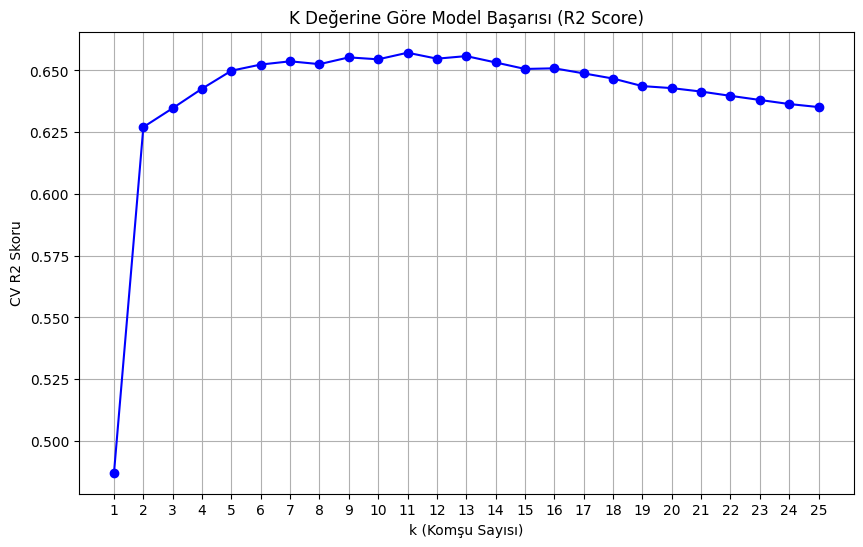

🏆 En iyi k değeri: 11 (Skor: 0.6572)


In [10]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# 1. Değişkenleri Hazırlama
k_values = range(1, 26) # 1'den 25'e kadar
scores = []

# 2. Döngü ile Her k Değerini Test Etme
print("K optimizasyonu başlıyor...", end="")
for k in k_values:
    # Modeli o anki k değeri ile kur
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Cross-Validation ile skorla (X_rescaled kullanıyoruz!)
    score = cross_val_score(knn, X_rescaled, y, cv=5).mean()
    scores.append(score)
print(" Tamamlandı! ✅")

# 3. Sonuçları Görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o', linestyle='-', color='b')
plt.title('K Değerine Göre Model Başarısı (R2 Score)')
plt.xlabel('k (Komşu Sayısı)')
plt.ylabel('CV R2 Skoru')
plt.xticks(k_values) # X ekseninde tüm sayıları göster
plt.grid(True)
plt.show()

# 4. En iyi k değerini yazdırma
best_k = k_values[scores.index(max(scores))]
print(f"🏆 En iyi k değeri: {best_k} (Skor: {max(scores):.4f})")

❓ K'nın hangi değeri en iyi performansı üretir? Cevabınızı `best_k` değişken adı altında kaydedin.

In [11]:
# En iyi performansı veren k değerini saklıyoruz
best_k = 11

print(f"Seçilen en iyi komşu sayısı: {best_k}")

Seçilen en iyi komşu sayısı: 11


<details>
<summary> 👉 Çözüm 👈</summary>
    
Grafiğinize bakarak, skorun k = 5 civarında artmayı durdurduğunu ve maksimum skorun k = 11 için ulaşıldığını görmelisiniz.

</details>

❓ $k$ < 5 değerleri için modelin kötü performansını nasıl yorumluyorsunuz?

<details>
<summary> 👉 Çözüm 👈</summary>
    
K çok küçük olduğunda, model eğitim kümesine aşırı uyum gösterme eğiliminde olacaktır. İyi genelleştirebilmek için çok az noktaya odaklanacaktır. K'yı artırmak modele tahminlerini dayandıracağı daha fazla örnek verecektir.

</details>

### 🧪 Kodunuzu kontrol edin

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('optimal_k',
                         optimal_k = best_k)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/egkpnr/.pyenv/versions/workintech_current/bin/python
cachedir: .pytest_cache
rootdir: /home/egkpnr/code/EGkpnr/S16D1-S-/S16D1-S-data-knn/tests
plugins: anyio-4.8.0, dash-3.3.0, typeguard-4.4.2, langsmith-0.6.0
collecting ... collected 1 item

test_optimal_k.py::TestOptimal_k::test_optimal_K_around_10 PASSED        [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/optimal_k.pickle

git commit -m 'Completed optimal_k step'

git push origin master



# KNN'de Aşırı Uyum

💡 KNN'lerin K parametresi çok küçük olduğunda, eğitim kümesine aşırı uyum gösterme ve iyi genelleştirememe riski vardır. 

👇 K=2 parametreli bir KNN'in öğrenme eğrilerini çizin.

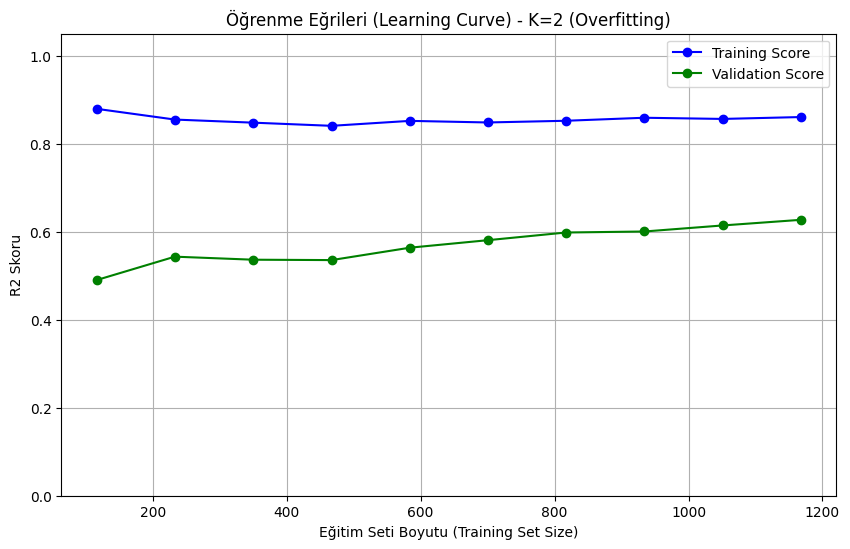

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsRegressor

# 1. Modeli Tanımlama (K=2, Overfitting'e meyilli)
knn_overfit = KNeighborsRegressor(n_neighbors=2)

# 2. Öğrenme Eğrisi Verilerini Hesaplama
# train_sizes: Eğitim setinin farklı boyutları (örn: %10, %30... %100)
# cv=5: Her boyutta 5 katlı çapraz doğrulama yapar
train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn_overfit,
    X=X_rescaled,
    y=y,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), # %10'dan %100'e 10 adım
    scoring='r2'
)

# 3. Ortalamaları Alma (Her cv katı için ortalama skor)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# 4. Görselleştirme
plt.figure(figsize=(10, 6))

# Eğitim Skoru Çizgisi
plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')

# Test (Doğrulama) Skoru Çizgisi
plt.plot(train_sizes, test_mean, label='Validation Score', color='green', marker='o')

# Grafiği Süsleme
plt.title('Öğrenme Eğrileri (Learning Curve) - K=2 (Overfitting)')
plt.xlabel('Eğitim Seti Boyutu (Training Set Size)')
plt.ylabel('R2 Skoru')
plt.legend(loc='best')
plt.grid(True)
plt.ylim(0, 1.05) # Skoru 0-1 arasında tutmak için
plt.show()

👉 Yüksek eğitim skoru ama düşük test skoru gözlemlemelisiniz. ⚠️ Aşırı uyum uyarısı ⚠️ Bu çok düşük K parametresinden kaynaklanır.

# İdeal K

👇 Bu sefer, "$k$ Optimizasyonu" bölümünde bulduğunuz ideal K değeri için öğrenme eğrilerini çizin.

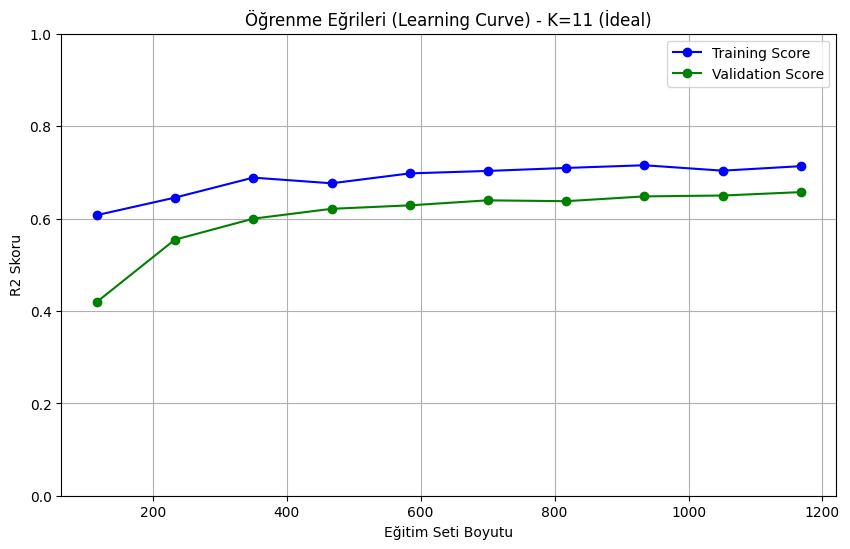

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsRegressor

# 1. Modeli Tanımlama (K=11, İdeal Dengeli Model)
best_k = 11
knn_ideal = KNeighborsRegressor(n_neighbors=best_k)

# 2. Öğrenme Eğrisi Verilerini Hesaplama
train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn_ideal,
    X=X_rescaled,
    y=y,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='r2'
)

# 3. Ortalamaları Alma
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# 4. Görselleştirme
plt.figure(figsize=(10, 6))

# Eğitim Skoru
plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')

# Test (Doğrulama) Skoru
plt.plot(train_sizes, test_mean, label='Validation Score', color='green', marker='o')

# Grafiği Süsleme
plt.title(f'Öğrenme Eğrileri (Learning Curve) - K={best_k} (İdeal)')
plt.xlabel('Eğitim Seti Boyutu')
plt.ylabel('R2 Skoru')
plt.legend(loc='best')
plt.grid(True)
plt.ylim(0, 1.0) 
plt.show()

👉 Eğriler yakınsamaya yakın olmalı, bu da modelin daha az aşırı uyum gösterdiğini ve daha iyi genelleştirdiğini gösterir.

💡 KNN modelleriyle modelleme yaparken hatırlanması gereken iki temel unsur vardır:  
    1. Mesafe tabanlı algoritmalar özelliklerin ölçeğine son derece duyarlıdır  
    2. K ayarlanmalıdır: performans, genelleştirme ve aşırı uyum arasındaki dengeyi kontrol eder

❓ Optimize edilmiş KNN modelinin gerçek fiyat ile tahmin edilen fiyat arasındaki ortalama fark nedir? Cevabınızı hesaplayın ve `price_error` değişken adı altında kaydedin

<details>
<summary> 💡 İpucu </summary>
    
Hesaplamanız gereken metrik **Negatif Ortalama Mutlak Hata (MAE)**'dır.

</details>

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# 1. Optimize Edilmiş Modeli Kurma (k=11)
knn_optimized = KNeighborsRegressor(n_neighbors=11)

# 2. Cross-Validation ile Negatif MAE Hesaplama
# scoring='neg_mean_absolute_error': Hata ne kadar küçükse (sıfıra yakınsa) o kadar iyidir.
# Sklearn bunu matematiksel olarak uydurmak için sonuçları negatif verir (örn: -30.000).
neg_mae_scores = cross_val_score(knn_optimized, X_rescaled, y, cv=5, scoring='neg_mean_absolute_error')

# 3. Pozitif Hataya Dönüştürme ve Kaydetme
# Eksiyi artı yapmak için başına '-' koyuyoruz veya abs() alıyoruz.
price_error = -neg_mae_scores.mean()

print(f"Ortalama Hata Payı (MAE): ${price_error:,.2f}")

Ortalama Hata Payı (MAE): $30,823.53


### 🧪 Kodunuzu kontrol edin

In [17]:
from nbresult import ChallengeResult

result = ChallengeResult('price_error',
                         error = price_error)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/egkpnr/.pyenv/versions/workintech_current/bin/python
cachedir: .pytest_cache
rootdir: /home/egkpnr/code/EGkpnr/S16D1-S-/S16D1-S-data-knn/tests
plugins: anyio-4.8.0, dash-3.3.0, typeguard-4.4.2, langsmith-0.6.0
collecting ... collected 1 item

test_price_error.py::TestPrice_error::test_price_error_range PASSED      [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/price_error.pickle

git commit -m 'Completed price_error step'

git push origin master



# Model Seçimi

❓ Ev fiyatlarını tahmin etme görevini gerçekleştirmek için bu iki modelden hangisini seçersiniz:
- Az önce ayarladığınız KNN modeli
- Bir Linear Regression modeli

Cevabınızı "KNN" veya "LinearReg" olarak `best_model` değişken adı altında string olarak kaydedin.

<details>
<summary> 💡 İpucu </summary>
    
Hangisini seçeceğinize karar vermek için, aynı görev üzerinde bir Linear Regression skorunu değerlendirmeniz ve KNN'in skoruyla karşılaştırmanız gerekecek. Aynı metrikleri karşılaştırdığınızdan emin olun!!

</details>

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# 1. Linear Regression Modelini Hazırlama
# Linear Regression ölçeklendirmeye KNN kadar duyarlı değildir ama 
# adil bir karşılaştırma için aynı veriyi (X_rescaled) kullanalım.
lin_model = LinearRegression()

# 2. Skorlama (Negatif MAE)
# KNN ile AYNI metrik (MAE) ve AYNI katlama sayısı (cv=5) kullanılmalı!
lin_scores = cross_val_score(lin_model, X_rescaled, y, cv=5, scoring='neg_mean_absolute_error')

# 3. Hatayı Hesaplama
lin_reg_error = -lin_scores.mean()

# 4. Sonuçları Karşılaştırma ve Seçim
print(f"📉 KNN Ortalama Hata (MAE):      ${price_error:,.2f}")
print(f"📉 Linear Reg. Ortalama Hata (MAE): ${lin_reg_error:,.2f}")

if lin_reg_error < price_error:
    best_model = "LinearReg"
    print("\n🏆 KAZANAN: Linear Regression (Daha Düşük Hata!)")
else:
    best_model = "KNN"
    print("\n🏆 KAZANAN: KNN (Daha Düşük Hata!)")

📉 KNN Ortalama Hata (MAE):      $30,823.53
📉 Linear Reg. Ortalama Hata (MAE): $33,586.17

🏆 KAZANAN: KNN (Daha Düşük Hata!)


💡 Her iki modelin metriklerini karşılaştırdığınızda, KNN modeli Linear Regression'ı geçmelidir. Bu, verideki doğrusal olmayan kalıpları yakalama yeteneğinden kaynaklanabilir.

### 🧪 Kodunuzu kontrol edin

In [19]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/egkpnr/.pyenv/versions/workintech_current/bin/python
cachedir: .pytest_cache
rootdir: /home/egkpnr/code/EGkpnr/S16D1-S-/S16D1-S-data-knn/tests
plugins: anyio-4.8.0, dash-3.3.0, typeguard-4.4.2, langsmith-0.6.0
collecting ... collected 1 item

test_best_model.py::TestBest_model::test_best_model PASSED               [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master



# 🏁